In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Data/PLAYERS.csv")

In [4]:
#df.info()

**Feature Selection**
Dropping Constant Columns.Columns That are all "0"and Constant


In [5]:
df.shape

(941, 45)

In [6]:
df.head()

,Unnamed: 0,Name,Apps,Mins,Mins/Gm,Height,Weight,Age,Av Rat,Gls,...,Off,Based,Tck R,CA,Saves,Saves/xSv%,Gls/xG,Dist/Mins,Transfer Value,Value
0,0,Josip Mijatović,12.0,809.0,67.416667,173.0,68.0,20,7.14,1.0,...,0.0,Croatia (3. HNL Zapad),0.88,84,0.0,0.0,5.555556,0.126823,€3K - €9K,6000.0
1,1,Duje Ninčević,15.0,1161.0,77.400000,172.0,69.0,25,6.84,0.0,...,0.0,Croatia (3. HNL Jug),0.76,79,0.0,0.0,0.000000,0.129457,€0 - €2.5K,1250.0
2,2,Marin Karabatić,15.0,1350.0,90.000000,170.0,62.0,22,6.90,0.0,...,0.0,Croatia (3. HNL Jug),0.77,87,0.0,0.0,0.000000,0.128000,€0 - €12K,6000.0
3,3,Vicko Ševelj,20.0,1738.0,86.900000,192.0,86.0,22,7.15,1.0,...,1.0,Bosnia & Herzegovina (Liga 12),0.88,95,0.0,0.0,2.380952,0.058631,€100K - €1M,550000.0
4,4,Fran Vujnović,15.0,1384.0,92.266667,190.0,77.0,19,7.23,4.0,...,0.0,Croatia (3. HNL Istok),0.93,83,0.0,0.0,0.000000,0.016040,€14K - €150K,82000.0


In [7]:
df2=df.drop(['Name','Based','Transfer Value'], axis=1)

In [8]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df2)

VarianceThreshold(threshold=0)

In [9]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True])

In [10]:
df2.columns[var_thres.get_support()]

Index(['Unnamed: 0', 'Apps', 'Mins', 'Mins/Gm', 'Height', 'Weight', 'Age',
       'Av Rat', 'Gls', 'Gls/90', 'Shot %', 'Pen/R', 'xG', 'Ch C/90',
       'Asts/90', 'K Ps/90', 'Pas %', 'Cr C/A', 'Drb/90', 'Distance', 'Hdr %',
       'K Tck', 'Fls', 'Int/90', 'Clear', 'Pens Saved Ratio', 'PoM',
       'Aer A/90', 'Off', 'Tck R', 'CA', 'Gls/xG', 'Dist/Mins', 'Value'],
      dtype='object')

In [11]:
constant_columns = [column for column in df2.columns
                    if column not in df2.columns[var_thres.get_support()]]

print(len(constant_columns))

8


In [12]:
for feature in constant_columns:
     print(feature)

Con/90
xSv %
Sv %
Svh
Svt
Svp
Saves
Saves/xSv%


In [13]:
df2.drop(constant_columns,axis=1)

,Unnamed: 0,Apps,Mins,Mins/Gm,Height,Weight,Age,Av Rat,Gls,Gls/90,...,Clear,Pens Saved Ratio,PoM,Aer A/90,Off,Tck R,CA,Gls/xG,Dist/Mins,Value
0,0,12.0,809.0,67.416667,173.0,68.0,20,7.14,1.0,0.11,...,24.0,0.0,1.0,4.45,0.0,0.88,84,5.555556,0.126823,6000.0
1,1,15.0,1161.0,77.400000,172.0,69.0,25,6.84,0.0,0.00,...,46.0,0.0,0.0,4.26,0.0,0.76,79,0.000000,0.129457,1250.0
2,2,15.0,1350.0,90.000000,170.0,62.0,22,6.90,0.0,0.00,...,78.0,0.0,1.0,6.73,0.0,0.77,87,0.000000,0.128000,6000.0
3,3,20.0,1738.0,86.900000,192.0,86.0,22,7.15,1.0,0.05,...,74.0,0.0,1.0,5.75,1.0,0.88,95,2.380952,0.058631,550000.0
4,4,15.0,1384.0,92.266667,190.0,77.0,19,7.23,4.0,0.26,...,16.0,0.0,0.0,1.56,0.0,0.93,83,0.000000,0.016040,82000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,1114,13.0,1119.0,86.076923,184.0,76.0,27,6.81,1.0,0.08,...,22.0,0.0,0.0,6.27,4.0,0.48,152,0.432900,0.142002,80500000.0
937,1116,17.0,1457.0,85.705882,186.0,79.0,24,7.20,0.0,0.00,...,116.0,0.0,1.0,13.84,1.0,0.68,168,0.000000,0.113315,121500000.0
938,1117,11.0,924.0,84.000000,184.0,82.0,36,7.15,0.0,0.00,...,66.0,0.0,1.0,10.62,0.0,0.74,156,0.000000,0.123268,15000000.0
939,1118,13.0,1129.0,86.846154,183.0,75.0,28,7.33,1.0,0.08,...,77.0,0.0,0.0,11.80,1.0,1.00,163,3.448276,0.126749,113500000.0


In [14]:
df4=df.drop(['Con/90','xSv %','Sv %','Svh','Svt','Svp','Saves','Saves/xSv%'],axis=1)



In [15]:
df4.head()

,Unnamed: 0,Name,Apps,Mins,Mins/Gm,Height,Weight,Age,Av Rat,Gls,...,PoM,Aer A/90,Off,Based,Tck R,CA,Gls/xG,Dist/Mins,Transfer Value,Value
0,0,Josip Mijatović,12.0,809.0,67.416667,173.0,68.0,20,7.14,1.0,...,1.0,4.45,0.0,Croatia (3. HNL Zapad),0.88,84,5.555556,0.126823,€3K - €9K,6000.0
1,1,Duje Ninčević,15.0,1161.0,77.400000,172.0,69.0,25,6.84,0.0,...,0.0,4.26,0.0,Croatia (3. HNL Jug),0.76,79,0.000000,0.129457,€0 - €2.5K,1250.0
2,2,Marin Karabatić,15.0,1350.0,90.000000,170.0,62.0,22,6.90,0.0,...,1.0,6.73,0.0,Croatia (3. HNL Jug),0.77,87,0.000000,0.128000,€0 - €12K,6000.0
3,3,Vicko Ševelj,20.0,1738.0,86.900000,192.0,86.0,22,7.15,1.0,...,1.0,5.75,1.0,Bosnia & Herzegovina (Liga 12),0.88,95,2.380952,0.058631,€100K - €1M,550000.0
4,4,Fran Vujnović,15.0,1384.0,92.266667,190.0,77.0,19,7.23,4.0,...,0.0,1.56,0.0,Croatia (3. HNL Istok),0.93,83,0.000000,0.016040,€14K - €150K,82000.0


In [16]:

dfp=df4.drop(["Name","Transfer Value"],axis=1)





In [17]:
dfp.head()

,Unnamed: 0,Apps,Mins,Mins/Gm,Height,Weight,Age,Av Rat,Gls,Gls/90,...,Pens Saved Ratio,PoM,Aer A/90,Off,Based,Tck R,CA,Gls/xG,Dist/Mins,Value
0,0,12.0,809.0,67.416667,173.0,68.0,20,7.14,1.0,0.11,...,0.0,1.0,4.45,0.0,Croatia (3. HNL Zapad),0.88,84,5.555556,0.126823,6000.0
1,1,15.0,1161.0,77.400000,172.0,69.0,25,6.84,0.0,0.00,...,0.0,0.0,4.26,0.0,Croatia (3. HNL Jug),0.76,79,0.000000,0.129457,1250.0
2,2,15.0,1350.0,90.000000,170.0,62.0,22,6.90,0.0,0.00,...,0.0,1.0,6.73,0.0,Croatia (3. HNL Jug),0.77,87,0.000000,0.128000,6000.0
3,3,20.0,1738.0,86.900000,192.0,86.0,22,7.15,1.0,0.05,...,0.0,1.0,5.75,1.0,Bosnia & Herzegovina (Liga 12),0.88,95,2.380952,0.058631,550000.0
4,4,15.0,1384.0,92.266667,190.0,77.0,19,7.23,4.0,0.26,...,0.0,0.0,1.56,0.0,Croatia (3. HNL Istok),0.93,83,0.000000,0.016040,82000.0


In [18]:
rows_with_zero = dfp[dfp['Pens Saved Ratio'] == 0.0]

In [19]:
num_zeros = len(rows_with_zero)

In [20]:
print("Number of rows with 0.0 in the Pens Saved Ratio column:", num_zeros)

Number of rows with 0.0 in the Pens Saved Ratio column: 907


In [21]:
dfp.shape

(941, 35)

Dropping Column Pens Saved Ratio.beacuese it is Related To Gola keepers 
You Can Check Above How Many Columns Are 0.0





In [22]:
dfp_1=dfp.drop(["Pens Saved Ratio",'Unnamed: 0'	],axis=1)

In [23]:
dfp_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Apps       941 non-null    float64
 1   Mins       941 non-null    float64
 2   Mins/Gm    941 non-null    float64
 3   Height     941 non-null    float64
 4   Weight     941 non-null    float64
 5   Age        941 non-null    int64  
 6   Av Rat     941 non-null    float64
 7   Gls        941 non-null    float64
 8   Gls/90     941 non-null    float64
 9   Shot %     941 non-null    float64
 10  Pen/R      941 non-null    float64
 11  xG         941 non-null    float64
 12  Ch C/90    941 non-null    float64
 13  Asts/90    941 non-null    float64
 14  K Ps/90    941 non-null    float64
 15  Pas %      941 non-null    float64
 16  Cr C/A     941 non-null    float64
 17  Drb/90     941 non-null    float64
 18  Distance   941 non-null    float64
 19  Hdr %      941 non-null    float64
 20  K Tck     

Explotary Data Analysis


In [24]:
dfp_1.describe()

,Apps,Mins,Mins/Gm,Height,Weight,Age,Av Rat,Gls,Gls/90,Shot %,...,Int/90,Clear,PoM,Aer A/90,Off,Tck R,CA,Gls/xG,Dist/Mins,Value
count,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.00000,941.000000,...,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,9.410000e+02
mean,15.128587,1311.953241,86.558363,183.463337,76.773645,26.109458,7.019288,0.876727,0.06051,0.260606,...,1.887088,70.248672,0.599362,8.599054,1.197662,0.816366,117.989373,1.532876,0.114771,1.075761e+07
std,5.699519,510.888102,5.751001,6.538429,7.078645,3.322029,0.209081,1.198270,0.08218,0.184420,...,0.931352,50.826633,0.893213,4.696258,1.688268,0.126116,19.845893,5.752318,0.031094,2.546099e+07
min,11.000000,756.000000,63.000000,161.000000,56.000000,18.000000,6.360000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.050000,0.000000,0.200000,70.000000,0.000000,0.000930,7.500000e+02
25%,12.000000,1005.000000,83.750000,179.000000,72.000000,24.000000,6.880000,0.000000,0.00000,0.130000,...,1.080000,24.000000,0.000000,4.700000,0.000000,0.750000,104.000000,0.000000,0.111037,1.800000e+05
50%,14.000000,1170.000000,88.142857,184.000000,77.000000,26.000000,7.010000,0.000000,0.00000,0.250000,...,1.950000,61.000000,0.000000,7.480000,1.000000,0.830000,117.000000,0.000000,0.119330,1.320000e+06
75%,16.000000,1398.000000,90.000000,188.000000,81.000000,28.000000,7.150000,1.000000,0.09000,0.380000,...,2.660000,110.000000,1.000000,13.100000,2.000000,0.910000,130.000000,1.526718,0.135765,6.900000e+06
max,50.000000,4514.000000,115.363636,204.000000,106.000000,39.000000,8.170000,9.000000,0.57000,1.000000,...,4.420000,316.000000,8.000000,19.780000,13.000000,1.000000,177.000000,100.000000,0.160410,3.040000e+08


In [25]:
df_summary = dfp_1.describe()
print(df_summary.to_string(index=True))

             Apps         Mins     Mins/Gm      Height      Weight         Age      Av Rat         Gls     Gls/90      Shot %       Pen/R          xG     Ch C/90     Asts/90     K Ps/90       Pas %      Cr C/A      Drb/90    Distance       Hdr %       K Tck         Fls      Int/90       Clear         PoM    Aer A/90         Off       Tck R          CA      Gls/xG   Dist/Mins         Value
count  941.000000   941.000000  941.000000  941.000000  941.000000  941.000000  941.000000  941.000000  941.00000  941.000000  941.000000  941.000000  941.000000  941.000000  941.000000  941.000000  941.000000  941.000000  941.000000  941.000000  941.000000  941.000000  941.000000  941.000000  941.000000  941.000000  941.000000  941.000000  941.000000  941.000000  941.000000  9.410000e+02
mean    15.128587  1311.953241   86.558363  183.463337   76.773645   26.109458    7.019288    0.876727    0.06051    0.260606    0.030159    0.960276    0.293326    0.092094    0.643794    0.902965    0.213092    0.3

In [26]:
dfp_1_variance = dfp_1.var(numeric_only=True)

In [27]:
dfp_1_variance

Apps         3.248451e+01
Mins         2.610067e+05
Mins/Gm      3.307401e+01
Height       4.275105e+01
Weight       5.010722e+01
Age          1.103588e+01
Av Rat       4.371492e-02
Gls          1.435851e+00
Gls/90       6.753569e-03
Shot %       3.401059e-02
Pen/R        2.882668e-02
xG           6.456446e-01
Ch C/90      1.864231e-01
Asts/90      1.151593e-02
K Ps/90      3.090700e-01
Pas %        2.155987e-03
Cr C/A       5.917606e-02
Drb/90       2.520591e-01
Distance     2.796333e+03
Hdr %        1.203927e-02
K Tck        2.363909e+00
Fls          9.559907e+01
Int/90       8.674158e-01
Clear        2.583347e+03
PoM          7.978294e-01
Aer A/90     2.205484e+01
Off          2.850250e+00
Tck R        1.590529e-02
CA           3.938595e+02
Gls/xG       3.308917e+01
Dist/Mins    9.668153e-04
Value        6.482619e+14
dtype: float64

"CA"-Current Ability Is Traget Variable

In [28]:
dfp_1['CA'].describe()

count    941.000000
mean     117.989373
std       19.845893
min       70.000000
25%      104.000000
50%      117.000000
75%      130.000000
max      177.000000
Name: CA, dtype: float64

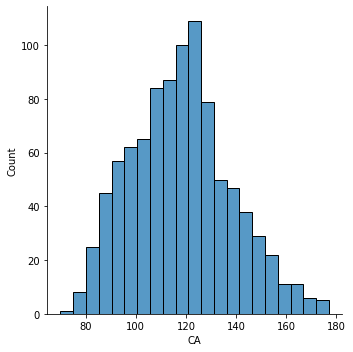

In [29]:
sns.displot(dfp_1['CA'])

In [30]:
#skweness and curtosis
print("Skewness: %f" %dfp_1['CA'].skew())
print("Kurtosis: %f" %dfp_1['CA'].kurt())

Skewness: 0.299492
Kurtosis: -0.287937


Text(0.5, 1.0, 'Scatter plot of Dist/Mins vs CA')

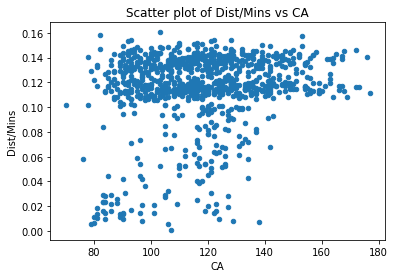

In [31]:
dfp_1.plot.scatter(x='CA', y='Dist/Mins')
plt.title('Scatter plot of Dist/Mins vs CA')

Text(0.5, 1.0, 'Scatter plot of Gls vs CA')

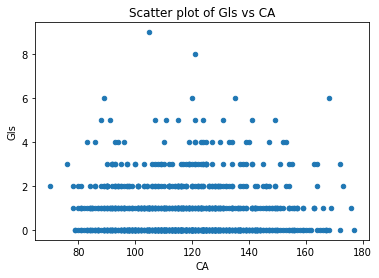

In [32]:
dfp_1.plot.scatter(x='CA', y='Gls')
plt.title('Scatter plot of Gls vs CA')

Text(0.5, 1.0, 'Scatter plot of Asts/90 vs CA')

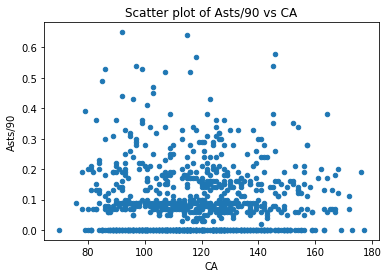

In [33]:
dfp_1.plot.scatter(x='CA', y='Asts/90')
plt.title('Scatter plot of Asts/90 vs CA')

Text(0.5, 1.0, 'Scatter plot of Pas % vs CA')

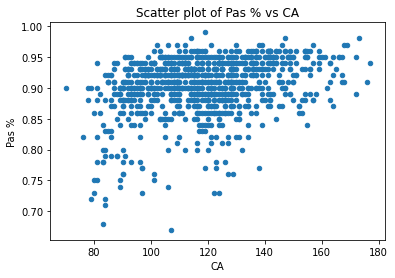

In [34]:
dfp_1.plot.scatter(x='CA', y='Pas %')
plt.title('Scatter plot of Pas % vs CA')

In [35]:
#sns.pairplot(dfp_1,palette='viridis')

In [36]:
dfp_1['Based'].value_counts()


France (Ligue 1)                            71
France (Ligue 2)                            70
Italy (Serie A)                             57
Portugal (Primeira Liga)                    57
Portugal (Liga Portugal 2)                  48
                                            ..
Switzerland (Challenge League)               1
Hungary (OTP Bank Liga)                      1
France (National 3 Auvergne-Rhône-Alpes)     1
France (National 3 Nouvelle-Aquitaine)       1
Croatia (Regionalne Lige - Sibenik)          1
Name: Based, Length: 76, dtype: int64

In [37]:
correlation = dfp_1.corr()['CA']
print(correlation)

Apps         0.168147
Mins         0.167728
Mins/Gm      0.032038
Height       0.066330
Weight       0.048229
Age         -0.034110
Av Rat       0.203611
Gls         -0.004708
Gls/90      -0.061331
Shot %       0.100601
Pen/R       -0.018905
xG           0.094263
Ch C/90      0.080979
Asts/90     -0.018562
K Ps/90      0.001992
Pas %        0.304511
Cr C/A      -0.027058
Drb/90       0.003443
Distance     0.338794
Hdr %        0.067680
K Tck        0.153291
Fls          0.058221
Int/90       0.062024
Clear        0.063295
PoM          0.118106
Aer A/90     0.014521
Off         -0.006002
Tck R       -0.104716
CA           1.000000
Gls/xG      -0.031648
Dist/Mins    0.198506
Value        0.645979
Name: CA, dtype: float64


DataSet is with 33 Features To drop some Columns Checking For Multicolinearity

In [38]:
X = dfp_1.drop("CA",axis=1)   #Feature Matrix
y = dfp_1["CA"] 

In [39]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=0)

X_train.shape, X_test.shape

((705, 32), (236, 32))

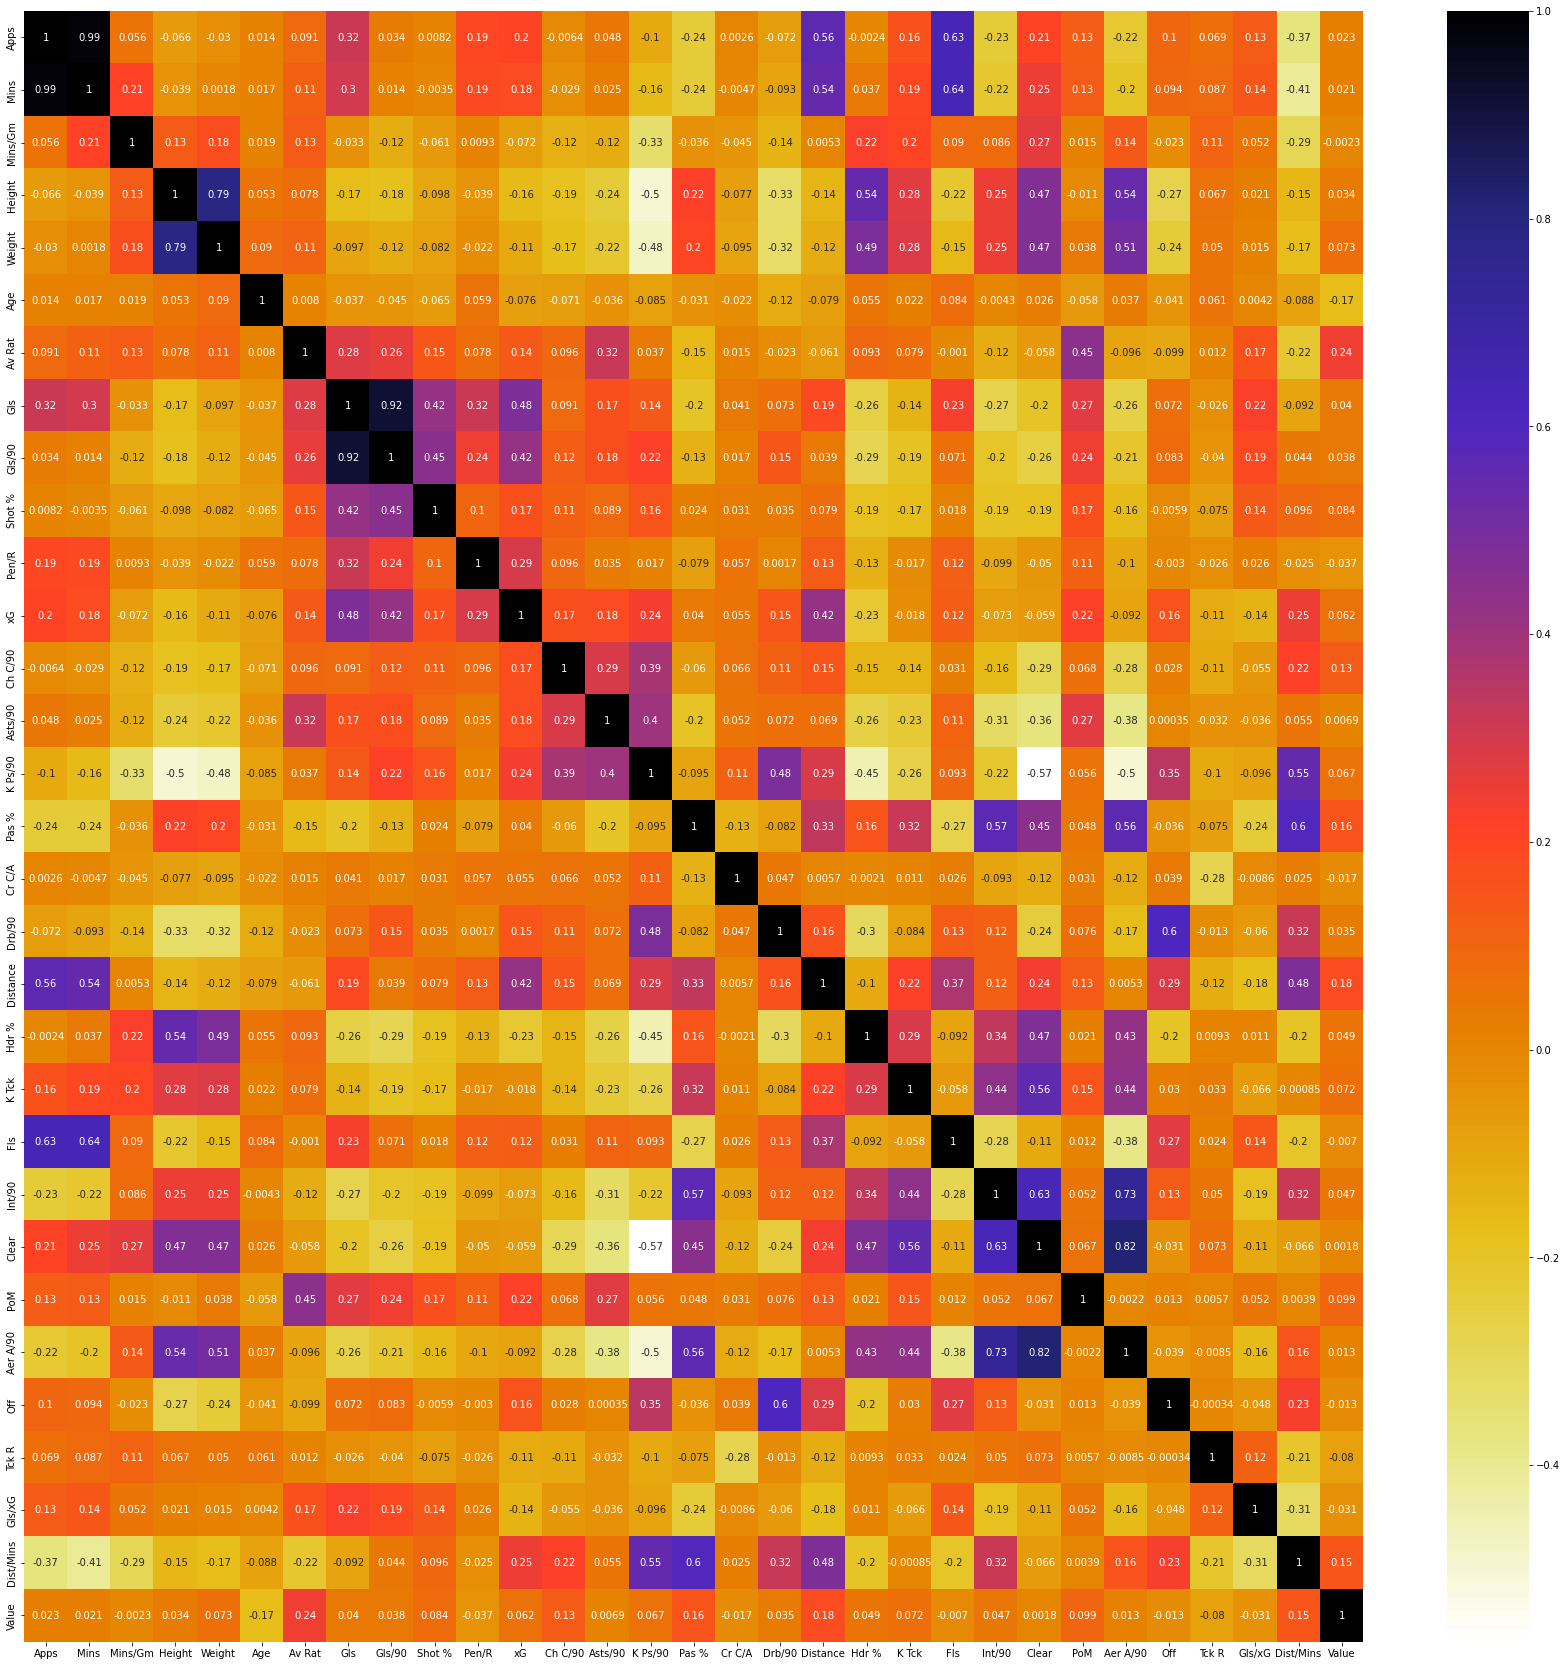

In [40]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [41]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [42]:
corr_features = correlation(X_train, 0.81)
len(set(corr_features))

3

In [43]:
corr_features

{'Aer A/90', 'Gls/90', 'Mins'}

In [44]:

#X_train.corr()


In [45]:
dfp_2=dfp_1.drop(['Aer A/90', 'Gls/90', 'Mins'],axis=1)

In [46]:
#dfp_2.info()

In [47]:
dfp_2.to_csv('Players.csv',index=False)

Dropping Outliers

In [48]:
# calculate z-score for each column
z = np.abs(dfp_2.select_dtypes(exclude=['object']).apply(lambda x: (x - x.mean()) / x.std()))

# drop outliers for columns that are not "Based"
dfp_3 = dfp_2[(z < 3).all(axis=1)]

In [49]:
#dfp_3.corr()

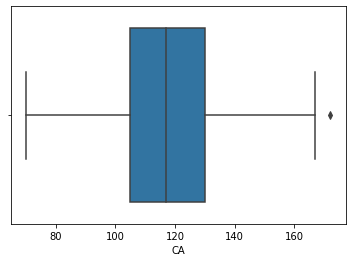

In [50]:
import seaborn as sns

sns.boxplot(x=dfp_3['CA'])
plt.show()

In [51]:
correlation = dfp_3[['Pen/R', 'CA']].corr().iloc[0, 1]
print(correlation)

nan


In [52]:
variance_penr = dfp_3['Pen/R'].var()
print(variance_penr)

0.0


In [53]:
#dfp_3 = dfp_3.drop(columns=['Pen/R'])

In [54]:
#dfp_3.corr()

In [55]:
X = dfp_3.drop("CA",axis=1)   #Feature Matrix
y = dfp_3["CA"] 

In [56]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=0)

X_train.shape, X_test.shape

((503, 29), (168, 29))

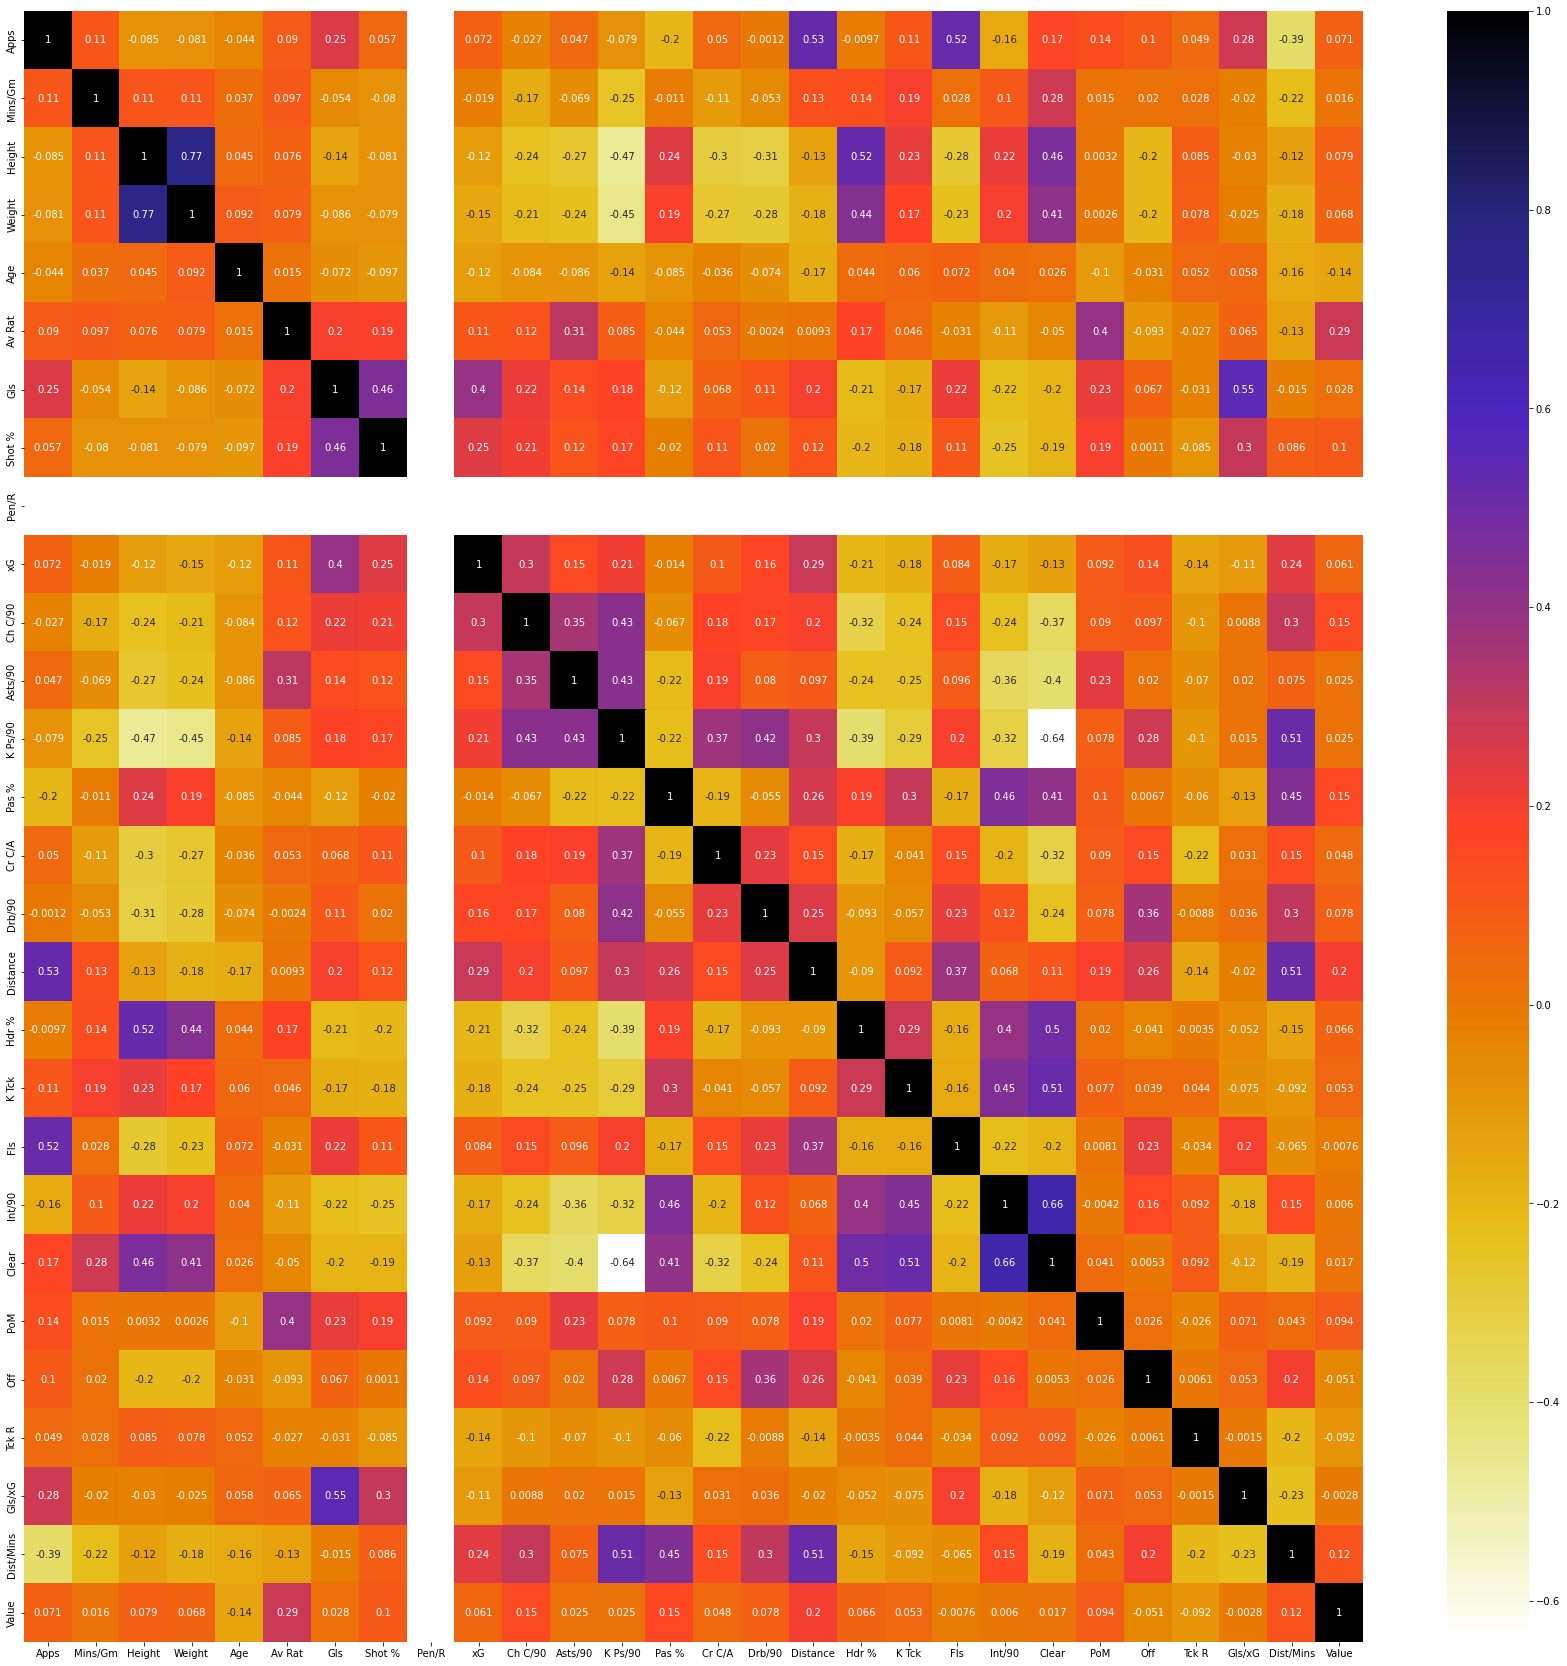

In [57]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [58]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [59]:
corr_features = correlation(X_train, 0.85)
len(set(corr_features))

0

In [60]:
corr_features

set()

In [61]:
#dfp_3.var()

In [62]:
#correlation = dfp_3.corr()["CA"]
#print(correlation)

In [63]:
value_counts = dfp_3['Based'].unique()
print(value_counts)

['Croatia (3. HNL Jug)' 'Bosnia & Herzegovina (Liga 12)'
 'Croatia (Druga HNL)' 'Croatia (3. HNL Zapad)' 'Croatia (Prva HNL)'
 'Croatia (3. HNL Istok)'
 'Portugal (Campeonato dos Açores - Ponta Delgada)'
 'Portugal (Primeira Liga)' 'Portugal (FPF Liga 3)' 'Slovenia (1. SNL)'
 'Portugal (Liga 3 Norte)' 'Portugal (Liga Portugal 2)'
 'Italy (Lega Nazionale Dilettanti D)'
 'Italy (Lega Nazionale Dilettanti C)' 'Portugal (Liga 3 Sul)'
 'Belgium (1B Pro League)' 'Argentina (Liga Profesional)'
 'Italy (Serie B)' 'France (National 2 Groupe C)'
 'Italy (Lega Nazionale Dilettanti E)'
 'Italy (Lega Nazionale Dilettanti H)'
 'Italy (Lega Nazionale Dilettanti A)' 'Slovenia (2. SNL)'
 'Austria (ADMIRAL 2. Liga)' 'Portugal (Campeonato Safina - Aveiro)'
 'France (National 2 Groupe B)' 'Italy (Lega Nazionale Dilettanti F)'
 'France (National 3 Nouvelle-Aquitaine)' 'France (National 2 Groupe A)'
 'France (Ligue 2)' 'Holland (Eerste Divisie)' 'Belgium (Pro League)'
 'Uruguay (Campeonato Uruguayo)' 'Serbi

In [64]:
dfp_4 = dfp_3.drop(columns=["Based"], axis=1)

Feature Selection


Mutual Information Gain



In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dfp_4.drop(labels=['CA'], axis=1),
    dfp_4['CA'],
    test_size=0.3,
    random_state=101)

In [66]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([2.55646264e-02, 0.00000000e+00, 2.48184861e-03, 5.29424507e-02,
       1.91534322e-02, 1.12828981e-01, 1.98325830e-02, 0.00000000e+00,
       6.14180132e-03, 8.70162901e-03, 3.80647235e-02, 0.00000000e+00,
       6.23171668e-02, 5.10803181e-02, 2.30842081e-02, 5.56115967e-02,
       1.02128534e-01, 5.60732563e-04, 1.78481132e-02, 9.96853710e-02,
       1.13889704e-01, 3.39569433e-02, 2.26985523e-02, 2.55351000e-02,
       0.00000000e+00, 2.46990226e-02, 1.35055369e-01, 9.33541983e-01])

In [67]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Value        0.933542
Dist/Mins    0.135055
Int/90       0.113890
Av Rat       0.112829
Distance     0.102129
Fls          0.099685
K Ps/90      0.062317
Drb/90       0.055612
Weight       0.052942
Pas %        0.051080
Ch C/90      0.038065
Clear        0.033957
Apps         0.025565
Off          0.025535
Gls/xG       0.024699
Cr C/A       0.023084
PoM          0.022699
Gls          0.019833
Age          0.019153
K Tck        0.017848
xG           0.008702
Pen/R        0.006142
Height       0.002482
Hdr %        0.000561
Asts/90      0.000000
Mins/Gm      0.000000
Shot %       0.000000
Tck R        0.000000
dtype: float64

Univariate Selection

In [68]:
X = dfp_4.drop("CA",axis=1)   #Feature Matrix
y = dfp_4["CA"] 

In [69]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [70]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.01272982 0.00486819 0.00777844 0.00781847 0.01951931 0.0143837
 0.00341069 0.00572239 0.         0.0052959  0.00436372 0.00371915
 0.00453669 0.01370548 0.00516477 0.00429966 0.01293137 0.0056691
 0.0050916  0.00682606 0.00618727 0.00567121 0.00782859 0.00586303
 0.00547345 0.00340986 0.00966757 0.80806449]


In [71]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances_df = pd.DataFrame({'Feature Importance': feat_importances})
feat_importances_df = feat_importances_df.sort_values(by='Feature Importance', ascending=False)

print(feat_importances_df)

           Feature Importance
Value                0.808064
Age                  0.019519
Av Rat               0.014384
Pas %                0.013705
Distance             0.012931
Apps                 0.012730
Dist/Mins            0.009668
PoM                  0.007829
Weight               0.007818
Height               0.007778
Fls                  0.006826
Int/90               0.006187
Off                  0.005863
Shot %               0.005722
Clear                0.005671
Hdr %                0.005669
Tck R                0.005473
xG                   0.005296
Cr C/A               0.005165
K Tck                0.005092
Mins/Gm              0.004868
K Ps/90              0.004537
Ch C/90              0.004364
Drb/90               0.004300
Asts/90              0.003719
Gls                  0.003411
Gls/xG               0.003410
Pen/R                0.000000


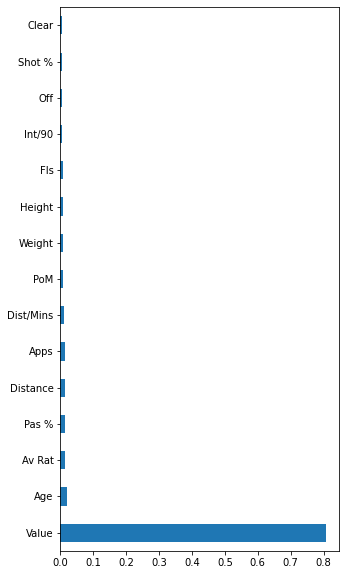

In [72]:
#plot graph of feature importances for better visualization
plt.figure(figsize=(5,10))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [73]:
correlation = dfp_4.corr()["CA"].sort_values(ascending=False)
print(correlation)

CA           1.000000
Value        0.695929
Av Rat       0.284117
Distance     0.283256
Pas %        0.251182
Apps         0.178255
PoM          0.148427
Shot %       0.138737
Dist/Mins    0.118578
Ch C/90      0.110536
K Tck        0.091980
Height       0.071654
Drb/90       0.062032
Fls          0.061112
Weight       0.060320
Asts/90      0.038175
Mins/Gm      0.027047
Hdr %        0.026707
Cr C/A       0.022618
xG           0.020993
Gls          0.005897
Gls/xG       0.001669
Clear       -0.013245
Int/90      -0.020480
K Ps/90     -0.027872
Age         -0.040280
Off         -0.043908
Tck R       -0.073768
Pen/R             NaN
Name: CA, dtype: float64


In [74]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
from lazypredict.Supervised import LazyRegressor

In [76]:
X = dfp_4.drop("CA",axis=1)   #Feature Matrix
y = dfp_4["CA"] 

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [79]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 95%|█████████▌| 40/42 [00:11<00:00,  2.90it/s]

[03:58:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [00:11<00:00,  3.63it/s]

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
GradientBoostingRegressor                    0.81       0.83   7.13   
RandomForestRegressor                        0.79       0.82   7.40   
XGBRegressor                                 0.79       0.82   7.41   
ExtraTreesRegressor                          0.79       0.82   7.47   
AdaBoostRegressor                            0.78       0.81   7.53   
BaggingRegressor                             0.77       0.81   7.71   
HistGradientBoostingRegressor                0.76       0.80   7.88   
LGBMRegressor                                0.76       0.80   7.92   
ExtraTreeRegressor                           0.56       0.62  10.74   
DecisionTreeRegressor                        0.55       0.62  10.84   
LassoCV                                      0.47       0.55  11.79   
LassoLarsCV                                  0.47       0.55  11.79   
LassoL

In [80]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.81,0.83,7.13,0.36
RandomForestRegressor,0.79,0.82,7.40,0.83
XGBRegressor,0.79,0.82,7.41,0.22
ExtraTreesRegressor,0.79,0.82,7.47,0.34
AdaBoostRegressor,0.78,0.81,7.53,0.12
BaggingRegressor,0.77,0.81,7.71,0.06
HistGradientBoostingRegressor,0.76,0.80,7.88,2.51
LGBMRegressor,0.76,0.80,7.92,0.13
ExtraTreeRegressor,0.56,0.62,10.74,0.03


In [81]:
corr_matrix=dfp_4.corr()
corr_matrix["CA"].sort_values(ascending=False)

CA           1.00
Value        0.70
Av Rat       0.28
Distance     0.28
Pas %        0.25
Apps         0.18
PoM          0.15
Shot %       0.14
Dist/Mins    0.12
Ch C/90      0.11
K Tck        0.09
Height       0.07
Drb/90       0.06
Fls          0.06
Weight       0.06
Asts/90      0.04
Mins/Gm      0.03
Hdr %        0.03
Cr C/A       0.02
xG           0.02
Gls          0.01
Gls/xG       0.00
Clear       -0.01
Int/90      -0.02
K Ps/90     -0.03
Age         -0.04
Off         -0.04
Tck R       -0.07
Pen/R         NaN
Name: CA, dtype: float64

In [82]:
# Lets perform Feature selection using Anova or F-Test Linear Regression sklearn 
from sklearn.feature_selection import f_regression, SelectKBest

In [83]:
# apply SelectKBest class to extract top 30 best features
fs = SelectKBest(score_func=f_regression,k=28) ## Select k as per your business understaing
# Apply feature selection
fit = fs.fit(X,y)

In [84]:
features_score = pd.DataFrame(fit.scores_)
features_pvalue = pd.DataFrame(np.round(fit.pvalues_,4))
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)
# Assign the column name
feature_score.columns = ["Input_Features","F_Score","P_Value"]
print(feature_score.nsmallest(15,columns="F_Score"))

   Input_Features  F_Score  P_Value
25         Gls/xG     0.00     0.97
6             Gls     0.02     0.88
21          Clear     0.12     0.73
20         Int/90     0.28     0.60
9              xG     0.29     0.59
14         Cr C/A     0.34     0.56
17          Hdr %     0.48     0.49
1         Mins/Gm     0.49     0.48
12        K Ps/90     0.52     0.47
11        Asts/90     0.98     0.32
4             Age     1.09     0.30
23            Off     1.29     0.26
3          Weight     2.44     0.12
19            Fls     2.51     0.11
15         Drb/90     2.58     0.11


In [85]:
# Apply the Mutual Regression
from sklearn.feature_selection import mutual_info_regression
mir = mutual_info_regression(X,y)
mrs_score = pd.Series(mir,index=X.columns)
mrs_score.sort_values(ascending=True)

Height      0.00
Gls/xG      0.00
PoM         0.00
xG          0.00
Shot %      0.00
Pen/R       0.00
Tck R       0.00
Asts/90     0.00
Age         0.01
Apps        0.02
Fls         0.02
Cr C/A      0.03
Off         0.03
Int/90      0.04
Ch C/90     0.04
Weight      0.04
Clear       0.04
K Ps/90     0.05
Mins/Gm     0.05
Gls         0.05
Hdr %       0.05
Drb/90      0.06
K Tck       0.06
Av Rat      0.09
Pas %       0.10
Distance    0.10
Dist/Mins   0.11
Value       0.92
dtype: float64

In [86]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.4 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [88]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [89]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from xgboost import XGBRegressor
model = XGBRegressor()

[03:58:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:58:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:58:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:58:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:58:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:58:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:58:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:58:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

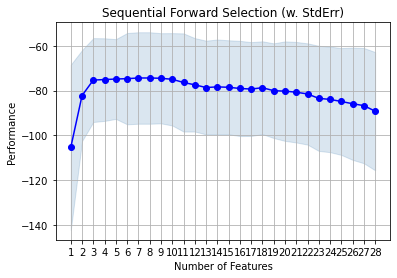

In [90]:
sfs = SFS(model, 
          k_features=28,#'best', 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)
sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
print("Selected Features :", sfs.k_feature_names_)
print("Selected Features ID :", sfs.k_feature_idx_)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [91]:
df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
df[["feature_idx","avg_score"]]

,feature_idx,avg_score
1,"(27,)",-105.30
2,"(23, 27)",-82.18
3,"(4, 23, 27)",-75.28
4,"(4, 6, 23, 27)",-75.07
5,"(4, 6, 13, 23, 27)",-74.82
6,"(0, 4, 6, 13, 23, 27)",-74.66
7,"(0, 4, 6, 11, 13, 23, 27)",-74.36
8,"(0, 4, 6, 8, 11, 13, 23, 27)",-74.36
9,"(0, 4, 6, 8, 11, 13, 22, 23, 27)",-74.49
10,"(0, 4, 6, 8, 11, 13, 15, 22, 23, 27)",-74.94


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor as XGB
model = XGBRegressor()


from mlxtend.feature_selection import ExhaustiveFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection

In [93]:
efs = ExhaustiveFeatureSelector(
           #knn(n_neighbors=3),
           #rfc(n_jobs=8),
           XGB(max_iter=100),
           min_features=1, 
           max_features=10, 
           #scoring = 'neg_mean_squared_error',  # sklearn regressors
           scoring='accuracy',  # sklearn classifiers,
           n_jobs=8,
           cv=3)

In [94]:
feature_names = tuple(X.columns)
feature_names

('Apps',
 'Mins/Gm',
 'Height',
 'Weight',
 'Age',
 'Av Rat',
 'Gls',
 'Shot %',
 'Pen/R',
 'xG',
 'Ch C/90',
 'Asts/90',
 'K Ps/90',
 'Pas %',
 'Cr C/A',
 'Drb/90',
 'Distance',
 'Hdr %',
 'K Tck',
 'Fls',
 'Int/90',
 'Clear',
 'PoM',
 'Off',
 'Tck R',
 'Gls/xG',
 'Dist/Mins',
 'Value')

In [95]:
dfp_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671 entries, 1 to 938
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Apps       671 non-null    float64
 1   Mins/Gm    671 non-null    float64
 2   Height     671 non-null    float64
 3   Weight     671 non-null    float64
 4   Age        671 non-null    int64  
 5   Av Rat     671 non-null    float64
 6   Gls        671 non-null    float64
 7   Shot %     671 non-null    float64
 8   Pen/R      671 non-null    float64
 9   xG         671 non-null    float64
 10  Ch C/90    671 non-null    float64
 11  Asts/90    671 non-null    float64
 12  K Ps/90    671 non-null    float64
 13  Pas %      671 non-null    float64
 14  Cr C/A     671 non-null    float64
 15  Drb/90     671 non-null    float64
 16  Distance   671 non-null    float64
 17  Hdr %      671 non-null    float64
 18  K Tck      671 non-null    float64
 19  Fls        671 non-null    float64
 20  Int/90    

In [96]:
dfp_4.drop(labels=["Gls/xG", "Clear", "Pen/R", "xG"], axis=1, inplace=True)

In [97]:
dfp_4

,Apps,Mins/Gm,Height,Weight,Age,Av Rat,Gls,Shot %,Ch C/90,Asts/90,...,Hdr %,K Tck,Fls,Int/90,PoM,Off,Tck R,CA,Dist/Mins,Value
1,15.00,77.40,172.00,69.00,25,6.84,0.00,0.38,0.08,0.39,...,0.71,0.00,19.00,1.47,0.00,0.00,0.76,79,0.13,1250.00
3,20.00,86.90,192.00,86.00,22,7.15,1.00,0.30,0.00,0.26,...,0.80,2.00,17.00,1.40,1.00,1.00,0.88,95,0.06,550000.00
8,11.00,85.73,172.00,66.00,22,7.03,1.00,0.50,0.11,0.00,...,0.80,0.00,18.00,3.53,0.00,2.00,0.84,81,0.13,3000.00
9,11.00,88.82,190.00,80.00,30,6.96,0.00,0.20,0.20,0.00,...,0.79,4.00,14.00,3.04,1.00,0.00,0.85,85,0.12,6000.00
11,11.00,90.00,184.00,70.00,23,6.96,3.00,0.32,0.00,0.09,...,0.65,5.00,5.00,3.18,1.00,0.00,1.00,100,0.11,17000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,17.00,90.00,180.00,77.00,32,7.42,0.00,0.33,1.25,0.12,...,0.84,0.00,16.00,3.12,1.00,2.00,0.92,155,0.12,24250000.00
925,19.00,90.00,190.00,74.00,23,7.36,0.00,0.23,0.29,0.11,...,0.89,3.00,22.00,2.32,1.00,1.00,0.65,172,0.12,75000000.00
926,15.00,82.87,189.00,76.00,34,7.22,1.00,0.25,0.56,0.14,...,0.74,0.00,19.00,0.72,0.00,0.00,0.83,154,0.13,10250000.00
936,13.00,86.08,184.00,76.00,27,6.81,1.00,0.33,1.08,0.16,...,0.72,1.00,11.00,2.09,0.00,4.00,0.48,152,0.14,80500000.00


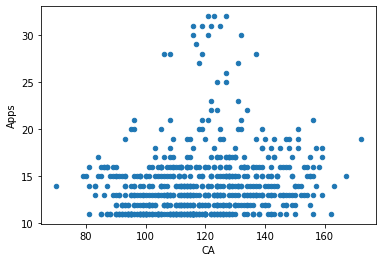

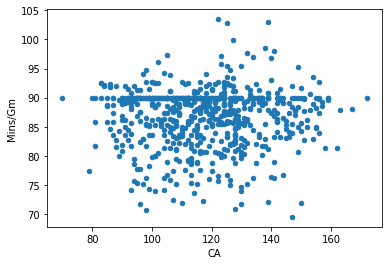

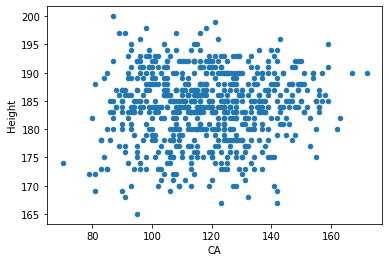

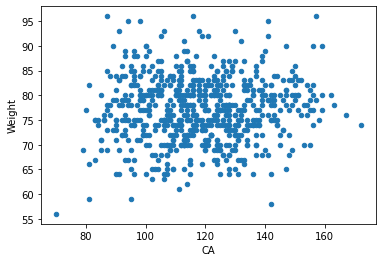

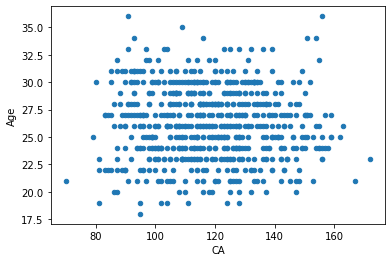

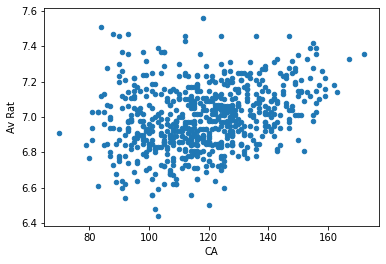

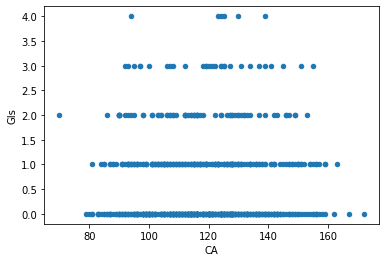

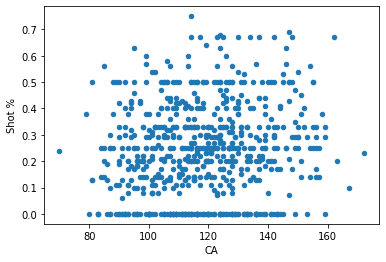

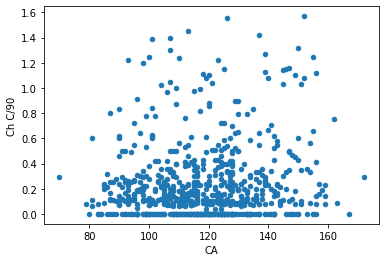

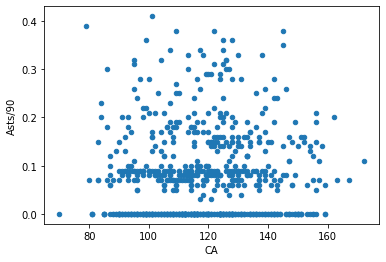

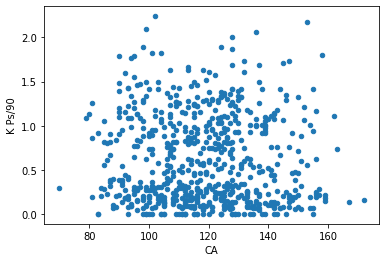

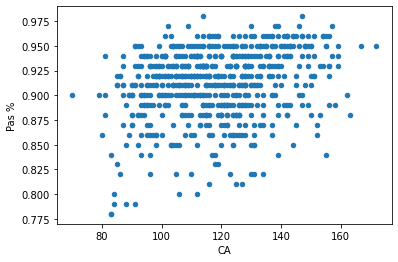

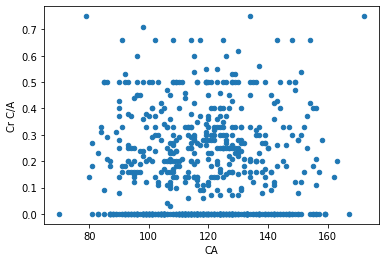

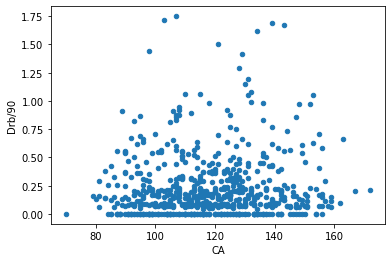

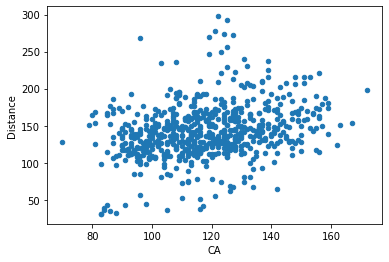

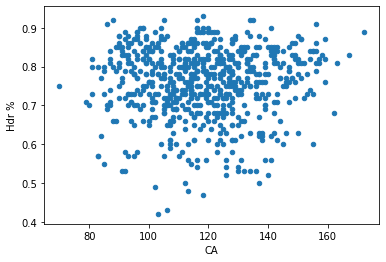

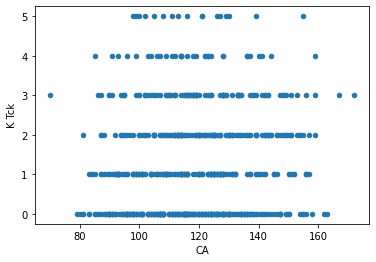

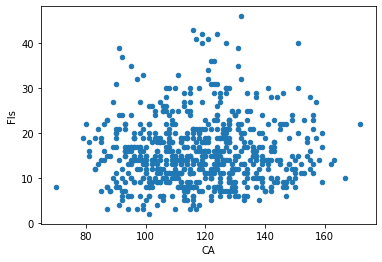

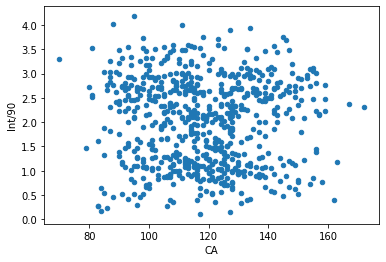

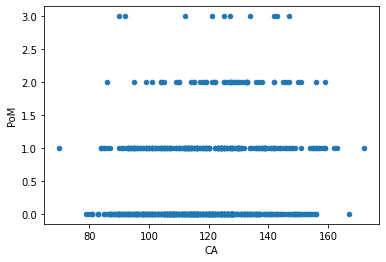

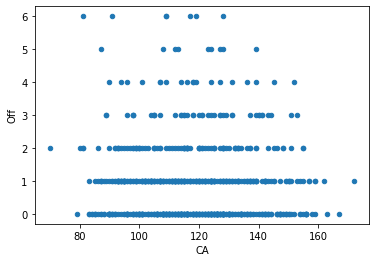

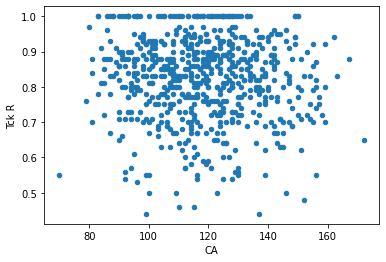

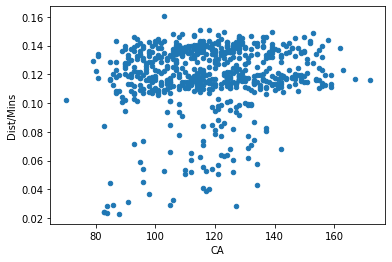

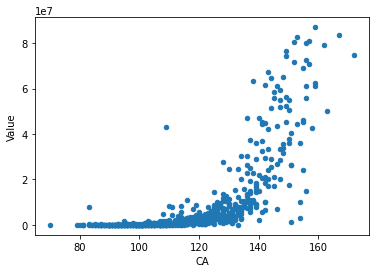

In [98]:
import matplotlib.pyplot as plt

# Loop over all the columns in the DataFrame
for column in dfp_4.columns:
    if column == "CA":
        continue
    dfp_4.plot(kind='scatter', x='CA', y=column)

# Show the plot
plt.show()

In [99]:
from lazypredict.Supervised import LazyRegressor

In [100]:
X = dfp_4.drop("CA",axis=1)   #Feature Matrix
y = dfp_4["CA"]

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [103]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 98%|█████████▊| 41/42 [00:11<00:00,  3.48it/s]

[04:00:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [00:11<00:00,  3.56it/s]

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
GradientBoostingRegressor                    0.81       0.83   7.24   
ExtraTreesRegressor                          0.80       0.82   7.41   
RandomForestRegressor                        0.79       0.82   7.47   
XGBRegressor                                 0.79       0.82   7.47   
AdaBoostRegressor                            0.79       0.82   7.47   
HistGradientBoostingRegressor                0.78       0.80   7.76   
LGBMRegressor                                0.78       0.80   7.78   
BaggingRegressor                             0.77       0.80   7.84   
ExtraTreeRegressor                           0.55       0.61  10.99   
DecisionTreeRegressor                        0.53       0.58  11.31   
LassoCV                                      0.47       0.53  12.00   
LassoLarsIC                                  0.47       0.53  12.00   
LarsCV

In [104]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.81,0.83,7.24,0.26
ExtraTreesRegressor,0.80,0.82,7.41,0.31
RandomForestRegressor,0.79,0.82,7.47,0.69
XGBRegressor,0.79,0.82,7.47,0.17
AdaBoostRegressor,0.79,0.82,7.47,0.13
HistGradientBoostingRegressor,0.78,0.80,7.76,0.22
LGBMRegressor,0.78,0.80,7.78,0.12
BaggingRegressor,0.77,0.80,7.84,0.06
ExtraTreeRegressor,0.55,0.61,10.99,0.02


In [105]:
X = dfp_4.drop("CA",axis=1)   #Feature Matrix
y = dfp_4["CA"]

In [106]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=0)

X_train.shape, X_test.shape

((503, 24), (168, 24))

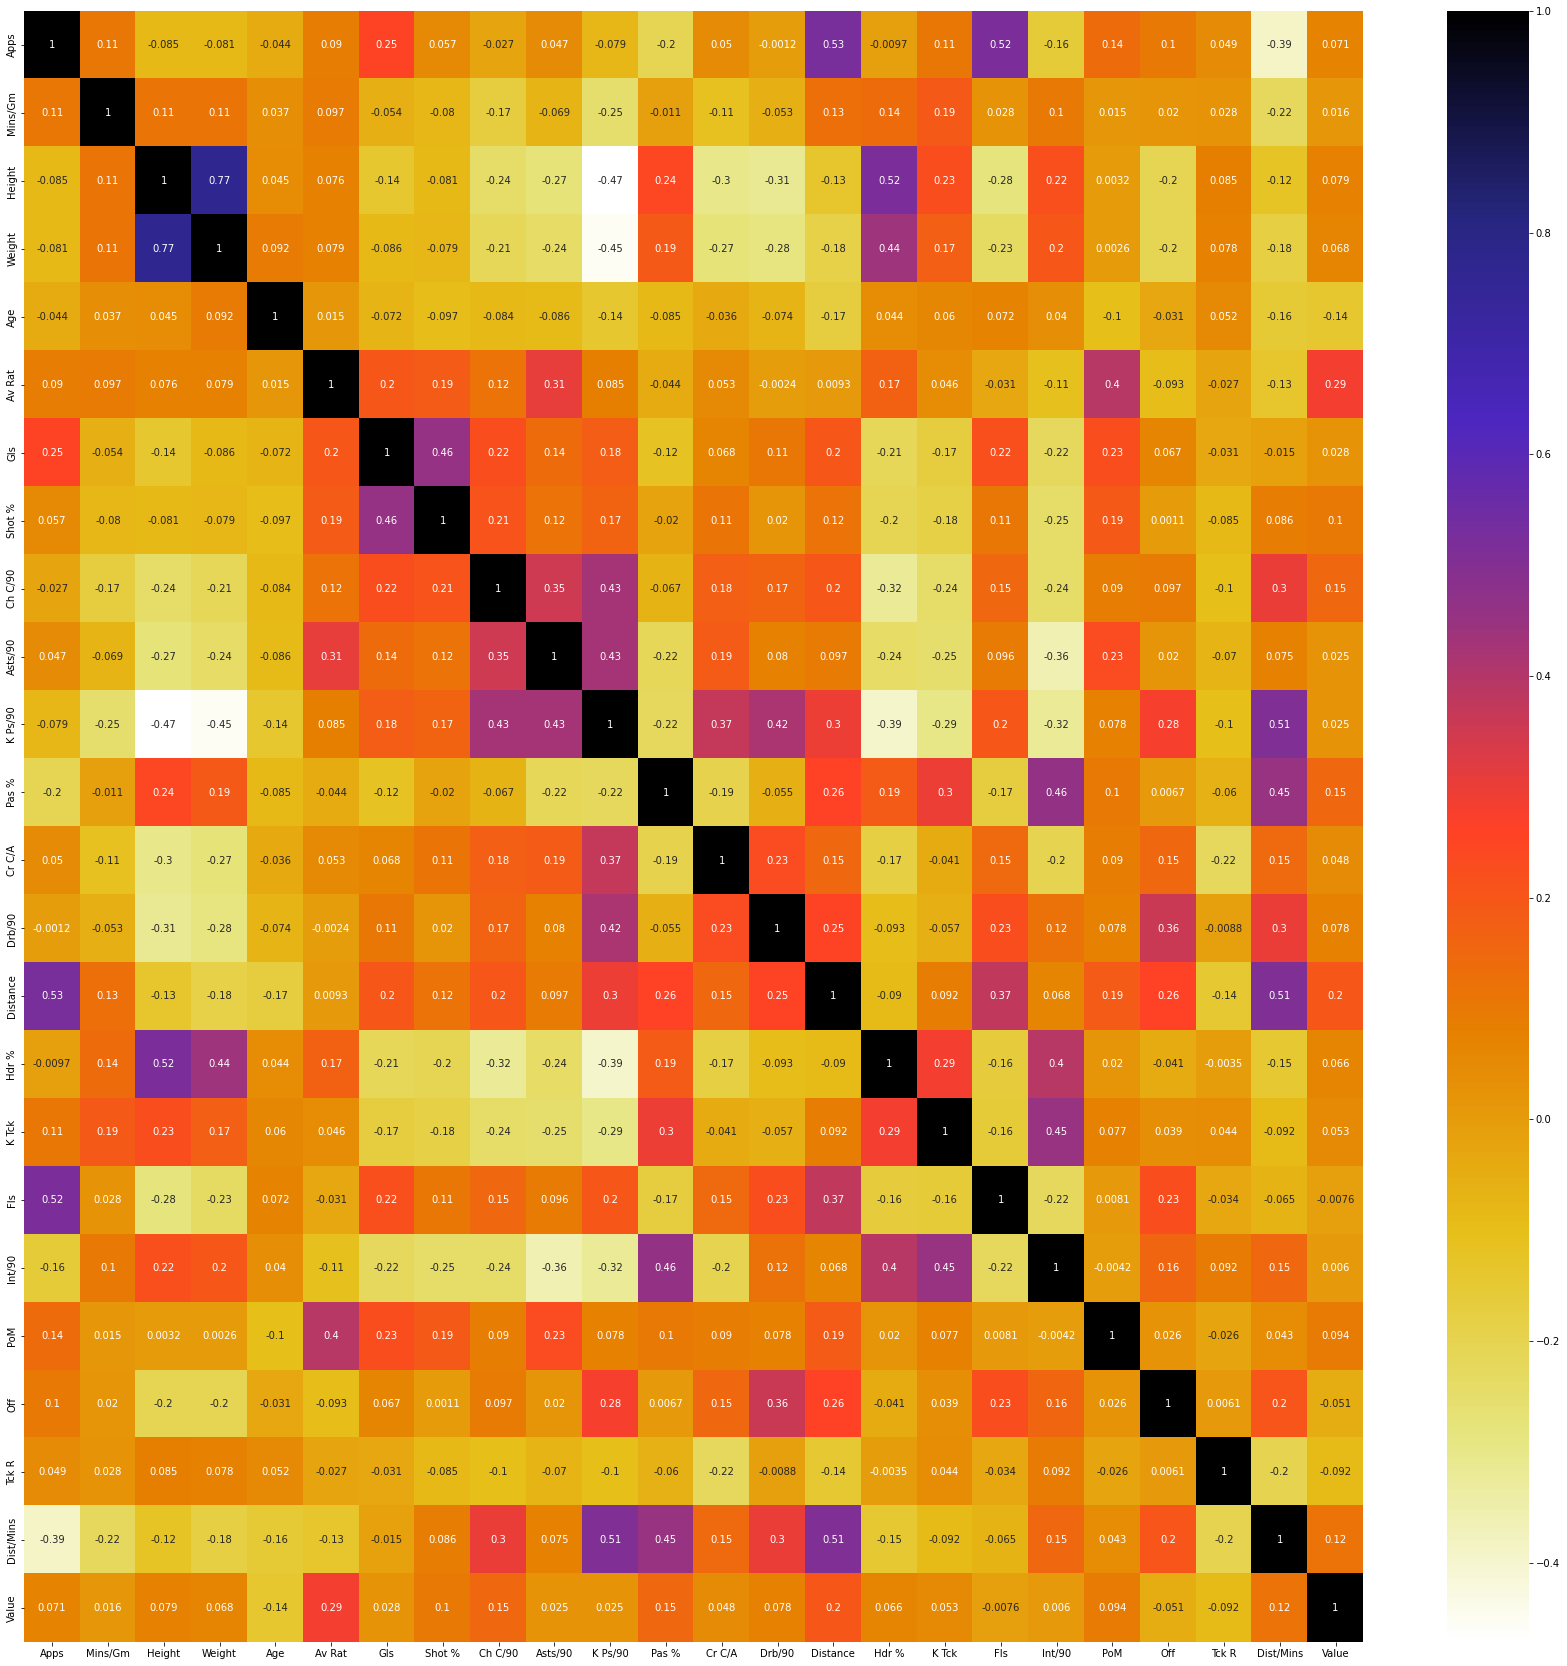

In [107]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [108]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [109]:
corr_features = correlation(X_train, 0.75)
len(set(corr_features))

1

In [110]:
corr_features

{'Weight'}

In [111]:
dfp_4

,Apps,Mins/Gm,Height,Weight,Age,Av Rat,Gls,Shot %,Ch C/90,Asts/90,...,Hdr %,K Tck,Fls,Int/90,PoM,Off,Tck R,CA,Dist/Mins,Value
1,15.00,77.40,172.00,69.00,25,6.84,0.00,0.38,0.08,0.39,...,0.71,0.00,19.00,1.47,0.00,0.00,0.76,79,0.13,1250.00
3,20.00,86.90,192.00,86.00,22,7.15,1.00,0.30,0.00,0.26,...,0.80,2.00,17.00,1.40,1.00,1.00,0.88,95,0.06,550000.00
8,11.00,85.73,172.00,66.00,22,7.03,1.00,0.50,0.11,0.00,...,0.80,0.00,18.00,3.53,0.00,2.00,0.84,81,0.13,3000.00
9,11.00,88.82,190.00,80.00,30,6.96,0.00,0.20,0.20,0.00,...,0.79,4.00,14.00,3.04,1.00,0.00,0.85,85,0.12,6000.00
11,11.00,90.00,184.00,70.00,23,6.96,3.00,0.32,0.00,0.09,...,0.65,5.00,5.00,3.18,1.00,0.00,1.00,100,0.11,17000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,17.00,90.00,180.00,77.00,32,7.42,0.00,0.33,1.25,0.12,...,0.84,0.00,16.00,3.12,1.00,2.00,0.92,155,0.12,24250000.00
925,19.00,90.00,190.00,74.00,23,7.36,0.00,0.23,0.29,0.11,...,0.89,3.00,22.00,2.32,1.00,1.00,0.65,172,0.12,75000000.00
926,15.00,82.87,189.00,76.00,34,7.22,1.00,0.25,0.56,0.14,...,0.74,0.00,19.00,0.72,0.00,0.00,0.83,154,0.13,10250000.00
936,13.00,86.08,184.00,76.00,27,6.81,1.00,0.33,1.08,0.16,...,0.72,1.00,11.00,2.09,0.00,4.00,0.48,152,0.14,80500000.00


<Figure size 864x576 with 0 Axes>

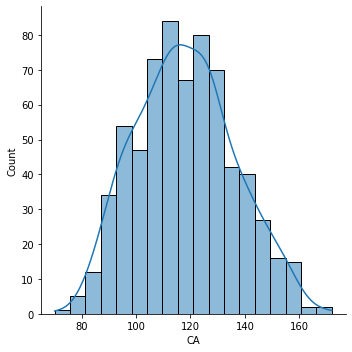

In [112]:
plt.figure(figsize=(12,8))
sns.displot(data=dfp_4,x='CA',kde=True)

In [113]:
dfp_4

,Apps,Mins/Gm,Height,Weight,Age,Av Rat,Gls,Shot %,Ch C/90,Asts/90,...,Hdr %,K Tck,Fls,Int/90,PoM,Off,Tck R,CA,Dist/Mins,Value
1,15.00,77.40,172.00,69.00,25,6.84,0.00,0.38,0.08,0.39,...,0.71,0.00,19.00,1.47,0.00,0.00,0.76,79,0.13,1250.00
3,20.00,86.90,192.00,86.00,22,7.15,1.00,0.30,0.00,0.26,...,0.80,2.00,17.00,1.40,1.00,1.00,0.88,95,0.06,550000.00
8,11.00,85.73,172.00,66.00,22,7.03,1.00,0.50,0.11,0.00,...,0.80,0.00,18.00,3.53,0.00,2.00,0.84,81,0.13,3000.00
9,11.00,88.82,190.00,80.00,30,6.96,0.00,0.20,0.20,0.00,...,0.79,4.00,14.00,3.04,1.00,0.00,0.85,85,0.12,6000.00
11,11.00,90.00,184.00,70.00,23,6.96,3.00,0.32,0.00,0.09,...,0.65,5.00,5.00,3.18,1.00,0.00,1.00,100,0.11,17000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,17.00,90.00,180.00,77.00,32,7.42,0.00,0.33,1.25,0.12,...,0.84,0.00,16.00,3.12,1.00,2.00,0.92,155,0.12,24250000.00
925,19.00,90.00,190.00,74.00,23,7.36,0.00,0.23,0.29,0.11,...,0.89,3.00,22.00,2.32,1.00,1.00,0.65,172,0.12,75000000.00
926,15.00,82.87,189.00,76.00,34,7.22,1.00,0.25,0.56,0.14,...,0.74,0.00,19.00,0.72,0.00,0.00,0.83,154,0.13,10250000.00
936,13.00,86.08,184.00,76.00,27,6.81,1.00,0.33,1.08,0.16,...,0.72,1.00,11.00,2.09,0.00,4.00,0.48,152,0.14,80500000.00


In [114]:
X = dfp_4.drop("CA",axis=1)   #Feature Matrix
y = dfp_4["CA"]

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
param_grid = {'max_depth': [5, 10, 15, 20],
              'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10],
              'max_features': [5, 10, 15, 17,24]}


In [117]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor()
grid_search = GridSearchCV(dt, param_grid, cv=5)

In [118]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [5, 10, 15, 17, 24],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]})

In [119]:
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error,: ", mse,)

Mean Squared Error,:  70.64078967615256


In [120]:
best_dt

DecisionTreeRegressor(max_depth=5, max_features=24, min_samples_leaf=10,
                      min_samples_split=10)

In [121]:
# Get the feature importances
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=5, max_features=24)


dt.fit(X_train, y_train)
# Get the feature importances
importances = dt.feature_importances_

# Sort the features by their importance
sorted_index = np.argsort(importances)[::-1]

# Print the best features
for i in sorted_index:
    print(f"{X.columns[i]}: {importances[i]}")

Value: 0.92860757636972
Age: 0.013273458748126387
Int/90: 0.012123905692831356
Weight: 0.009148545646958687
Apps: 0.009006042373319312
Pas %: 0.005910996714465287
Av Rat: 0.005390622576102832
PoM: 0.003893652689020658
Distance: 0.0037589622834479143
K Ps/90: 0.002780433994609655
Dist/Mins: 0.002164398985369849
Hdr %: 0.0021473711067874083
Shot %: 0.0017940328192405628
Drb/90: 0.0
Cr C/A: 0.0
Fls: 0.0
Ch C/90: 0.0
Gls: 0.0
K Tck: 0.0
Off: 0.0
Tck R: 0.0
Height: 0.0
Mins/Gm: 0.0
Asts/90: 0.0


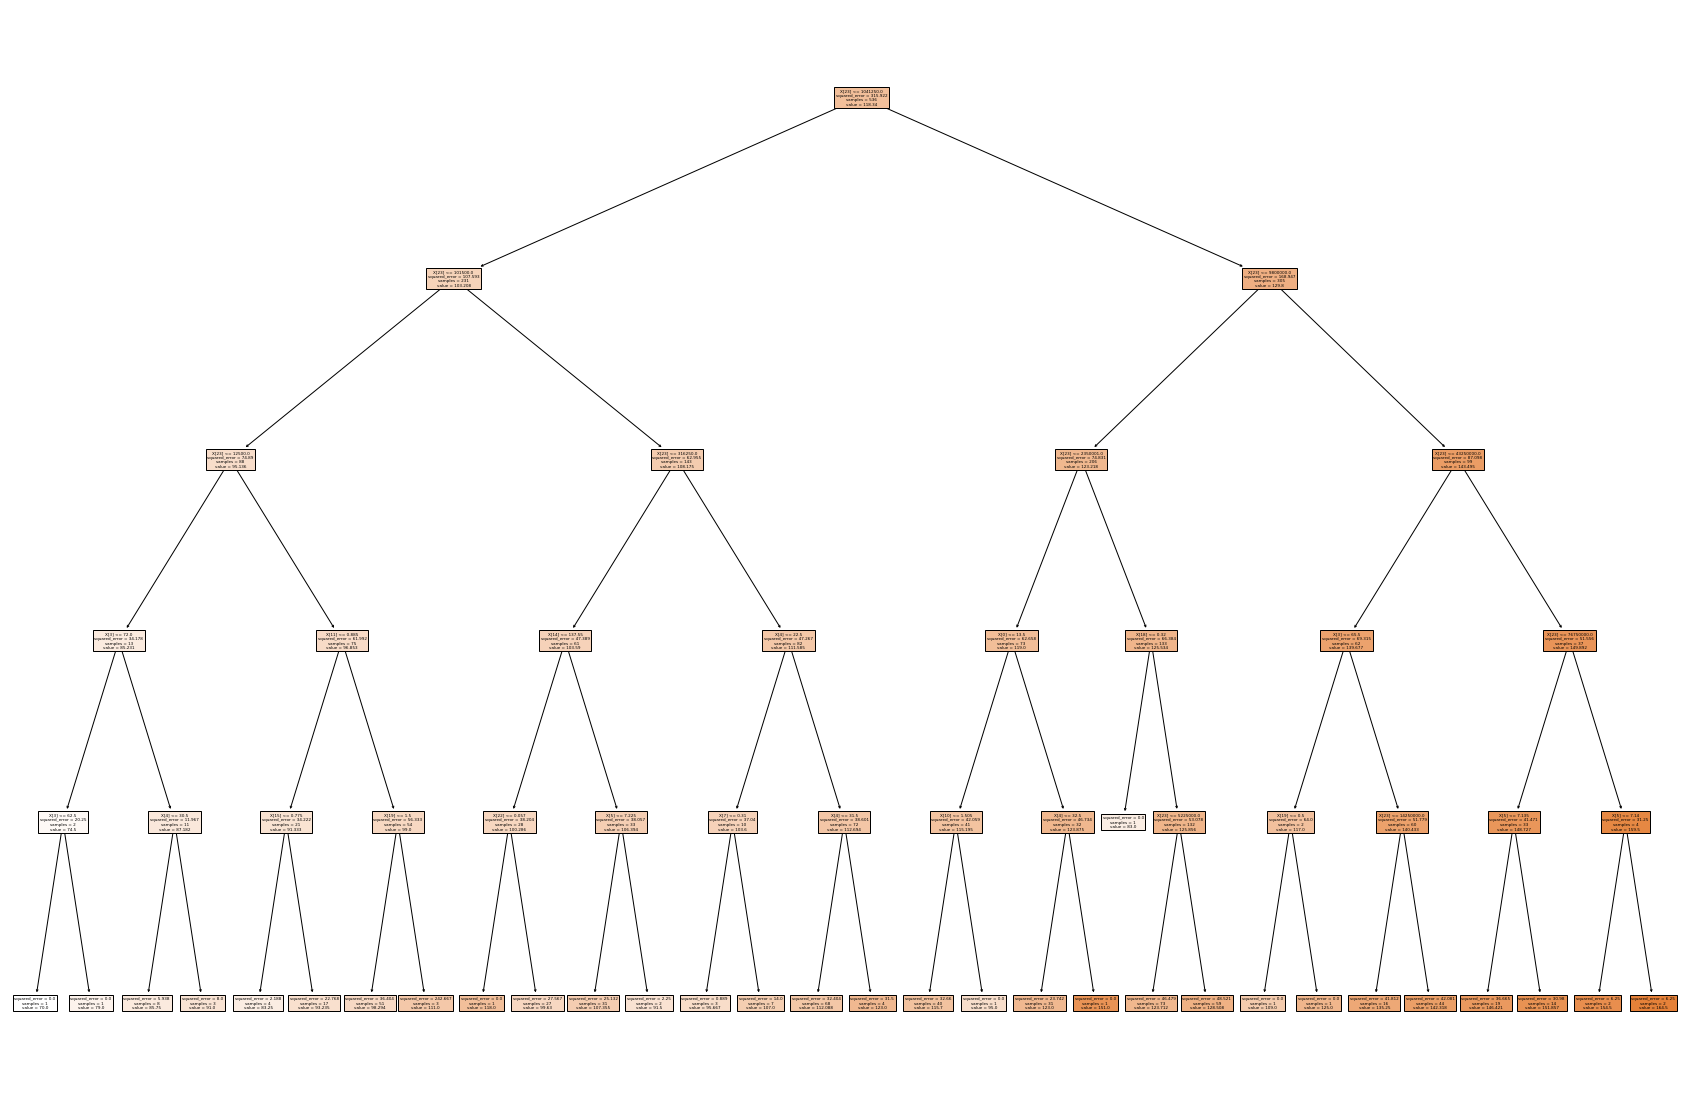

In [122]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(30,20))
tree.plot_tree(dt, filled=True)
plt.show()

In [123]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict the target variable for the test set
y_pred = dt.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 8.854508129962696


In [124]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')

In [125]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
trees = [10,50,100,150]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)
    print(n)

RMSE : 8.137011918570783
10
RMSE : 8.036475918285651
50
RMSE : 7.904358244617919
100
RMSE : 7.909326681815006
150


In [127]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],'bootstrap':[True,False],'oob_score':[True,False]}


In [128]:
rf = RandomForestRegressor()

# Wrap the regressor with GridSearchCV and specify the hyperparameters to search through
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [129]:
#grid_search.fit(X_train, y_train)

In [130]:
#print("Best hyperparameters found: ", grid_search.best_params_)

In [131]:
# Replace 'your_metric' with the appropriate performance metric, such as mean squared error or R^2 score
#print("Performance on test data: ", grid_search.score(X_test, y_test))

In [132]:
# Replace 'X_test' and 'y_test' with the test features and target variables, respectively
#y_pred = grid_search.predict(X_test)

# Replace 'your_metric' with the appropriate performance metric, such as mean squared error or R^2 score
#accuracy = grid_search.score(X_test, y_test)
#print("Accuracy: ", accuracy)

In [133]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [134]:
ada = AdaBoostRegressor()

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [136]:
param_grid = {'n_estimators': [50, 100, 150, 200, 250],
              'learning_rate': [0.01, 0.05, 0.1, 0.3, 1]}


In [137]:
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5)

In [138]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [139]:
best_params = grid_search.best_params_

In [140]:
best_params

{'learning_rate': 0.3, 'n_estimators': 50}

In [141]:
ada = AdaBoostRegressor(n_estimators=best_params['n_estimators'], learning_rate=best_params['learning_rate'])
ada.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.3)

In [142]:
y_pred = ada.predict(X_test)

In [143]:
mse = mean_squared_error(y_test, y_pred)

In [144]:
accuracy = r2_score(y_test, y_pred)

In [145]:
print("Best Parameters: ", best_params)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Accuracy: ", accuracy)

Best Parameters:  {'learning_rate': 0.3, 'n_estimators': 50}
Mean Squared Error:  65.13342087912079
Root Mean Squared Error:  8.854508129962696
Accuracy:  0.8253474793381388


In [146]:
dfp_4.to_csv('PLAYERS.csv',index=False)